# Implementation 01 - Model with only one perceptron

## Problem definition

* Conversion equation: T(F) = T(C) x 9/5 + 32

## 1. Library import

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Database import

In [2]:
temp_df = pd.read_csv('C:/Users/SAMSUNG/OneDrive/Documentos/PROJETOS/deep_learning_with_tensorflow/data/Celsius-to-Fahrenheit.csv')

In [3]:
temp_df.reset_index(drop=True, inplace=True)

In [4]:
temp_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [5]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


## 3. Database visualization

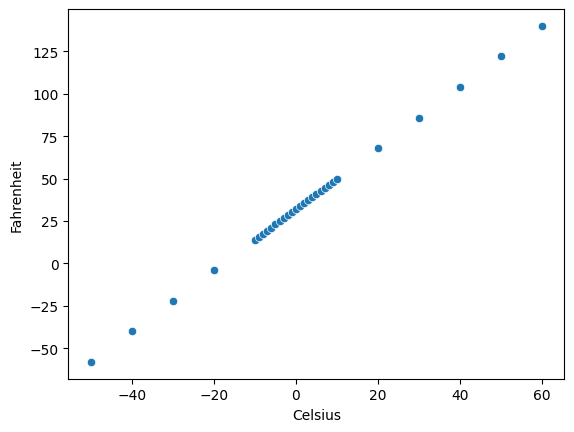

In [7]:
sns.scatterplot(data=temp_df, x='Celsius', y='Fahrenheit');

## 4. Training database configuration

In [8]:
X_train = temp_df['Celsius'].values
y_train = temp_df['Fahrenheit'].values

In [9]:
X_train[:5], y_train[:5]

(array([-50, -40, -30, -20, -10], dtype=int64),
 array([-58., -40., -22.,  -4.,  14.]))

## 5. Model building and training

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.summary()

c:\Users\SAMSUNG\OneDrive\Documentos\PROJETOS\deep_learning_with_tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [14]:
epochs_hist = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 8.9251
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 131.4228
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.7198
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 29.9898
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 74.3000
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 55.6693
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 16.0707
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0535
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 15.1044
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 34.4125
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 34.3268
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 18.3006
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.6724
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.4332
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.9629
Epoch 

## 6. Model evaluation

In [16]:
epochs_hist.history.keys()

dict_keys(['loss'])

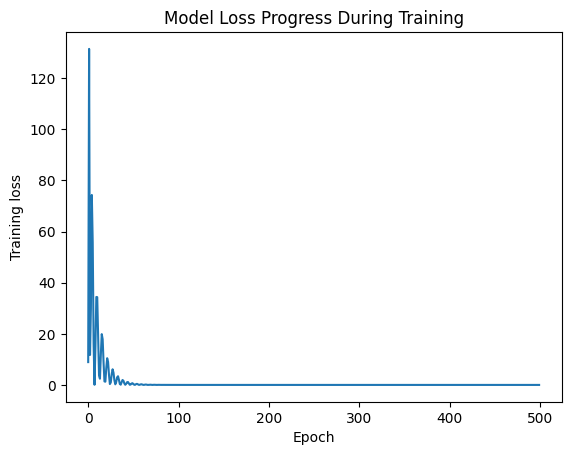

In [19]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss');

In [20]:
model.get_weights()

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

In [27]:
temp_c = np.array([0])
temp_f = model.predict(temp_c)
temp_f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[32.]], dtype=float32)

In [29]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

array([32.])